In [158]:
import scipy
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from random import uniform
import random
import math

## EXERCISE 1
The goal of simulated annealing is to maximize the performance of a model
relative to a fitness function defined over the model parameters you are seeking to
optimize. In Exercise 2, you will apply simulated annealing coded in scipy to
a one-dimensional problem in which you seek the value of X that maximizes the
output of a function called fitnessFunction. But first you must write code that
implements the function, which is the product of m and n:
m = 1+ cos(0.04v)2
n = exp(−v2 /(20000))

In [159]:
def fitnessFunction(x):
    m=1+math.cos(0.04*x)**2
    n=math.exp(-x**2/20000)
    return m*n

## EXERCISE 2
Display the fitness surface. To do this, make the wave fitness with 1000 points
starting at x= -500 and ending at x = 500 (using Data > Change Wave Scaling).
Set the yvalues in fitness to the corresponding value of the fitnessFunction(). Display
fitness and include the graph in your lab report.

Text(0.5, 1.0, 'Fitness function plot from -500 to 500')

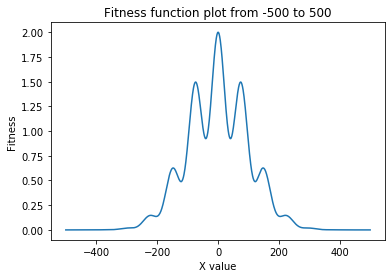

In [160]:
my_x=np.arange(-500,500,1)
my_y=[fitnessFunction(the_x) for the_x in my_x]
plt.plot(my_x,my_y)
plt.xlabel('X value')
plt.ylabel('Fitness')
plt.title('Fitness function plot from -500 to 500')

## EXERCISE 3
Run the algorithm with an initial X value of 250 and an initial temperature of 10.
Plot the trajectory of the annealing algorithm along the fitness surface, Include the
graph in your lab report.
Slowly increase the temperature until you find the peak about 90% of the time.
Report this temperature and explain its significance in terms of the relationship
between the search radius and the dimensions of the width of the fitness curve

In [161]:
#first we define the simulated annealing algo as a function
#function = fitness function to be used
#init_state = random initiated state
#init_T = start T°C of the annealing
#alpha = factor of reduction of T°C (usualy 99)
# final_T = stop temperature for annealing
# max_iter = max stop
# my_value = step of the perturbation to be applied at each temperature

def simulated_annealing (function, init_state, init_T, alpha, final_T, max_iter,my_value):
    random.seed()
    count=1
    my_score=[]
    my_state =[]
    my_best_energy_plot=[]
    my_T=init_T
    current_state=init_state
    my_best_energy=-1*function(current_state)
    my_best_X=current_state
    while (my_T>final_T):
        new_state = current_state + perturbation(my_value)
        energy_delta= -1*(function(new_state)-function(current_state))
        if energy_delta < 0 :
            current_state = new_state
            my_energy=-1*function(new_state)
            if my_energy < my_best_energy:
                my_best_X=new_state
                my_best_energy=my_energy
        else:
            proba = math.exp(-1*energy_delta/(my_T))
            my_rand_value=uniform(0,1)
            if my_rand_value<proba:
                current_state = new_state
        my_T=my_T*alpha
        count+=1
        
        if count>max_iter:
            break
        if abs(current_state)<2:
            break
        my_score.append(function(current_state))
        my_state.append(current_state)
        my_best_energy_plot.append(-1*my_best_energy)
        
    return my_best_X, count, my_score, my_best_energy, my_state,my_best_energy_plot

In [162]:
#then we define the perturbation function:
def perturbation(my_value):
    my_pert = round(uniform(-1*my_value,my_value),1)
    return my_pert

my best solution is  -1.6999999999998234
my best energy is  1.995094810702486


Text(0.5, 0, 'X value')

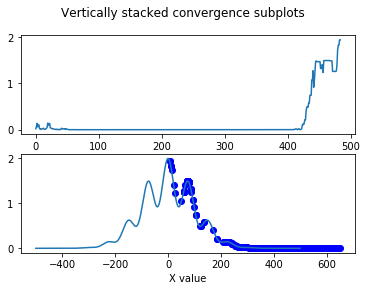

In [184]:
#Then we make it run for the first conditions: X=250, T_init=10
my_best_X, count, my_score, my_best_energy, my_state, my_best_energy_plot = simulated_annealing (fitnessFunction, 250, 10, 0.99, 0, 100000,50)

# we print results
print('my best solution is ', my_best_X)
print('my best energy is ', -1*my_best_energy)

fig, axs = plt.subplots(2)
fig.suptitle('Vertically stacked convergence subplots')
axs[0].plot(my_score)
axs[0].set_xlabel('number of iterations')
axs[1].plot(my_state,my_score,'bo')
axs[1].plot(my_x,my_y)
axs[1].set_xlabel('X value')

## EXERCISE 4
Another informative graph is the plot of all the intermediate best fitnesses versus
iteration number. Make this plot. Include the graph in your lab report.

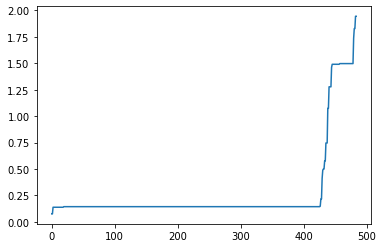

In [185]:
#we plot the evolution the best energy with iterations
plt.plot(my_best_energy_plot)

## EXERCISE 5 [Optional]
Complete the table below by running simulation 20 times with each of 10 different
values of temp shown. Plot number of failures vs temperature and number of
iterations to reach the peak vs temperature. Describe and explain any trends you
find.

In [186]:
# list of temperature
list_temp=[1,5,10,25,50,100,250,500,1000,2000,5000,10000]

my_result_fail=[]
my_number_of_iter=[]
#the loop
for j in range(len(list_temp)):
    my_temp=list_temp[j]
    my_bestX_vec=[]
    my_count_success=[]
    count_fail=0
    for i in range(20):
        my_best_X, count, my_score, my_best_energy, my_state, my_best_energy_plot = simulated_annealing (fitnessFunction, 250, my_temp, 0.99, 0, 10000,50)
        if abs(my_best_X)>2:
            count_fail+=1
        if abs(my_best_X)<2:
            my_count_success.append(count)
    my_result_fail.append(count_fail)
    my_number_of_iter.append(my_count_success)

Text(0, 0.5, 'number of failed convergence')

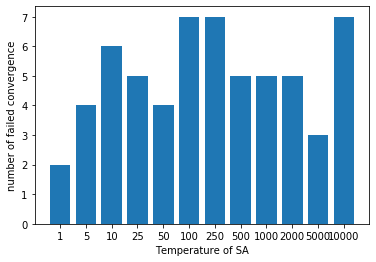

In [187]:
plt.bar(range(len(list_temp)),my_result_fail,tick_label=list_temp)
plt.xlabel("Temperature of SA")
plt.ylabel("number of failed convergence")

Text(0, 0.5, 'mean iterations to reach convergence')

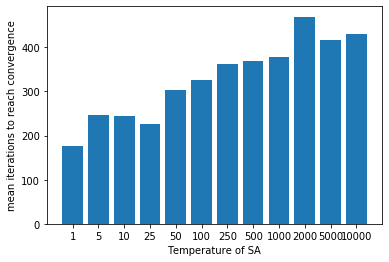

In [188]:
count_array=np.array(my_number_of_iter)
mean_value=[np.mean(x) for x in count_array]
plt.bar(range(len(list_temp)),mean_value,tick_label=list_temp)
plt.xlabel("Temperature of SA")
plt.ylabel("mean iterations to reach convergence")